# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [1]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [2]:
# Load Baseball Dataset
data = pd.read_csv('data/baseball2016-2017.csv')

In [3]:
#Drop postseason games
data = data[data['season'] != "post season"]

#Drop columns that don't have effect
data = data.drop("temperature", axis=1)
data = data.drop("wind_speed", axis=1)
data = data.drop("sky", axis=1)
data = data.drop("game_hours_dec", axis=1)
data = data.drop("wind_direction", axis=1)
data = data.drop("season", axis=1)
data = data.drop("game_type", axis=1)
data = data.drop("date", axis=1)
data = data.drop("day_of_week", axis=1)
data = data.drop("start_time", axis=1)
data = data.drop("venue", axis=1)
data = data.drop("field_type", axis=1)

#Drop teams because not looking individually
#data = data.drop("away_team", axis=1)
#data = data.drop("home_team", axis=1)
data = data.drop("attendance", axis=1)


data = data.drop(data.columns[0], axis=1)
data.head()

,away_team,away_team_errors,away_team_hits,away_team_runs,home_team,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss,home_team_outcome
0,New York Mets,1,7,3,Kansas City Royals,0,9,4,7,1,0,Win
1,Philadelphia Phillies,0,5,2,Cincinnati Reds,0,8,3,5,1,0,Win
2,Minnesota Twins,0,5,2,Baltimore Orioles,0,9,4,6,1,0,Win
3,Washington Nationals,0,8,3,Atlanta Braves,1,8,1,4,0,1,Loss
4,Colorado Rockies,1,8,4,Arizona Diamondbacks,0,8,3,7,0,1,Loss


In [5]:
#Group by hometeam get teams based on when they are at home
homeTeamSorted = data.groupby('home_team').sum()
homeTeamSorted.head()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss
home_team,,,,,,,,,
Arizona Diamondbacks,50,855,493,42,765,411,904,33,48
Atlanta Braves,58,712,404,60,712,335,739,31,50
Baltimore Orioles,42,699,336,39,688,376,712,50,31
Boston Red Sox,50,734,380,40,845,477,857,47,34
Chicago Cubs,40,546,247,47,674,389,636,57,24


In [6]:
#Divide the number of wins by 81 to get win percentage for each time while at home
homeWinPercentages = homeTeamSorted['home_team_win']/81
homeWinPercentages

home_team
Arizona Diamondbacks             0.407407
Atlanta Braves                   0.382716
Baltimore Orioles                0.617284
Boston Red Sox                   0.580247
Chicago Cubs                     0.703704
Chicago White Sox                0.555556
Cincinnati Reds                  0.469136
Cleveland Indians                0.654321
Colorado Rockies                 0.518519
Detroit Tigers                   0.555556
Houston Astros                   0.530864
Kansas City Royals               0.580247
Los Angeles Angels of Anaheim    0.493827
Los Angeles Dodgers              0.654321
Miami Marlins                    0.493827
Milwaukee Brewers                0.506173
Minnesota Twins                  0.370370
New York Mets                    0.543210
New York Yankees                 0.592593
Oakland Athletics                0.419753
Philadelphia Phillies            0.456790
Pittsburgh Pirates               0.469136
San Diego Padres                 0.481481
San Francisco Giants    

In [7]:
#Group by away team to get teams based on when they are away
awayTeamSorted = data.groupby('away_team').sum()
awayTeamSorted.head()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss
away_team,,,,,,,,,
Arizona Diamondbacks,59,714,341,53,708,397,738,45,36
Atlanta Braves,41,692,314,41,702,375,689,43,37
Baltimore Orioles,41,725,368,33,709,379,747,42,39
Boston Red Sox,35,753,401,51,608,314,715,35,46
Chicago Cubs,54,735,419,47,579,309,728,34,46


In [8]:
#Calculate win percentage for each team while away
awayWinPercentages = awayTeamSorted['home_team_loss']/81
awayWinPercentages.head()

away_team
Arizona Diamondbacks    0.444444
Atlanta Braves          0.456790
Baltimore Orioles       0.481481
Boston Red Sox          0.567901
Chicago Cubs            0.567901
Name: home_team_loss, dtype: float64

In [9]:
# Concatenate dataset to have away wins and home wins together.
winPercentage = pd.concat([awayWinPercentages, homeWinPercentages], sort=True, axis = 1)
winPercentage.columns = ['Away Wins', 'Home Wins']
winPercentage.head()

,Away Wins,Home Wins
Arizona Diamondbacks,0.444444,0.407407
Atlanta Braves,0.456790,0.382716
Baltimore Orioles,0.481481,0.617284
Boston Red Sox,0.567901,0.580247
Chicago Cubs,0.567901,0.703704


Text(0, 0.5, 'Avg Score Differential in Wins')

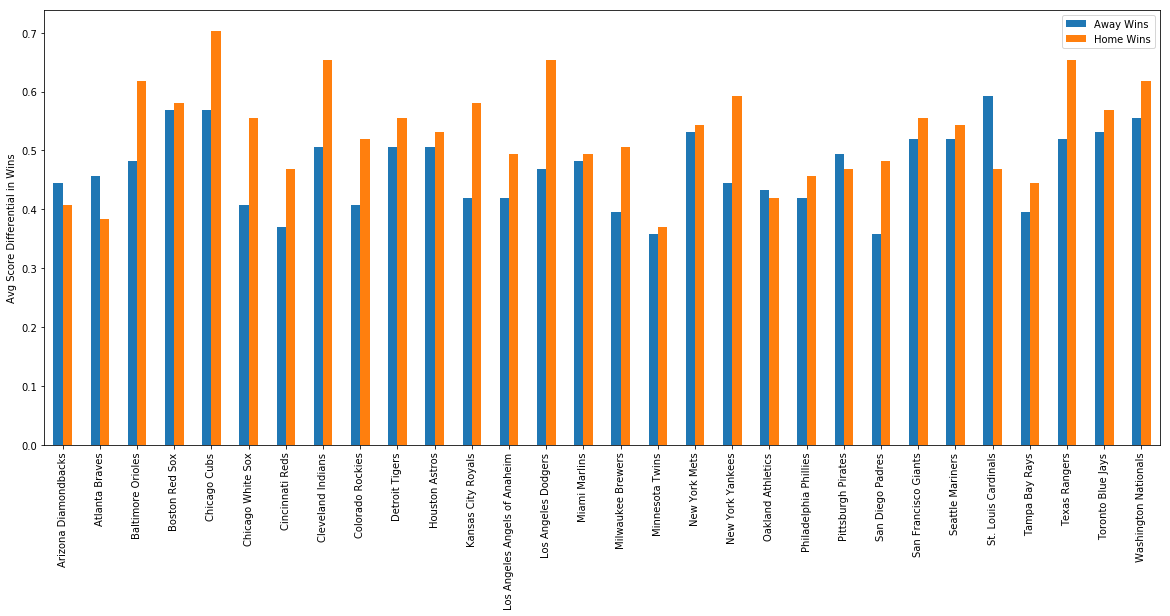

In [10]:
#Plot the data side by side
winPercentagePlot = winPercentage.plot.bar(figsize=(20,8))
winPercentagePlot.set_ylabel("Avg Score Differential in Wins")

## Score Differential

In [11]:
#Create a score differential column for home teams
teamScores = data
homeTeamScores = teamScores[teamScores['home_team_outcome'] == 'Win']
homeTeamScores['HomeScoreDiff'] = homeTeamScores['home_team_runs'].sub(homeTeamScores['away_team_runs'], axis=0)
homeTeamScores.head()

/home/bsuwirjo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,away_team,away_team_errors,away_team_hits,away_team_runs,home_team,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss,home_team_outcome,HomeScoreDiff
0,New York Mets,1,7,3,Kansas City Royals,0,9,4,7,1,0,Win,1
1,Philadelphia Phillies,0,5,2,Cincinnati Reds,0,8,3,5,1,0,Win,1
2,Minnesota Twins,0,5,2,Baltimore Orioles,0,9,4,6,1,0,Win,2
6,Toronto Blue Jays,0,9,2,Tampa Bay Rays,1,7,3,5,1,0,Win,1
8,St. Louis Cardinals,1,8,5,Pittsburgh Pirates,2,12,6,11,1,0,Win,1


In [12]:
# Group by hometeam and get average score diff
homeScoreDiff = homeTeamScores.groupby('home_team').mean()['HomeScoreDiff']
homeScoreDiff.head()

home_team
Arizona Diamondbacks    3.424242
Atlanta Braves          3.290323
Baltimore Orioles       3.260000
Boston Red Sox          4.191489
Chicago Cubs            3.614035
Name: HomeScoreDiff, dtype: float64

In [13]:
#Create a score differential column for away teams and groupby away teams
teamScores = data
awayTeamScores = teamScores[teamScores['home_team_outcome'] == 'Loss']
awayTeamScores['AwayScoreDiff'] = awayTeamScores['away_team_runs'].sub(awayTeamScores['home_team_runs'], axis=0)
awayScoreDiff = awayTeamScores.groupby('away_team').mean()['AwayScoreDiff']
awayScoreDiff.head()

/home/bsuwirjo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


away_team
Arizona Diamondbacks    3.194444
Atlanta Braves          2.513514
Baltimore Orioles       3.461538
Boston Red Sox          3.956522
Chicago Cubs            4.595745
Name: AwayScoreDiff, dtype: float64

In [14]:
#Create a scoreDiff dataframe
scoreDiff = pd.concat([awayScoreDiff, homeScoreDiff], sort=True, axis = 1)
scoreDiff.columns = ['Away Score Diff', 'Home Score Diff']
scoreDiff.head()

,Away Score Diff,Home Score Diff
Arizona Diamondbacks,3.194444,3.424242
Atlanta Braves,2.513514,3.290323
Baltimore Orioles,3.461538,3.260000
Boston Red Sox,3.956522,4.191489
Chicago Cubs,4.595745,3.614035


Text(0, 0.5, 'Avg Score Differential in Wins')

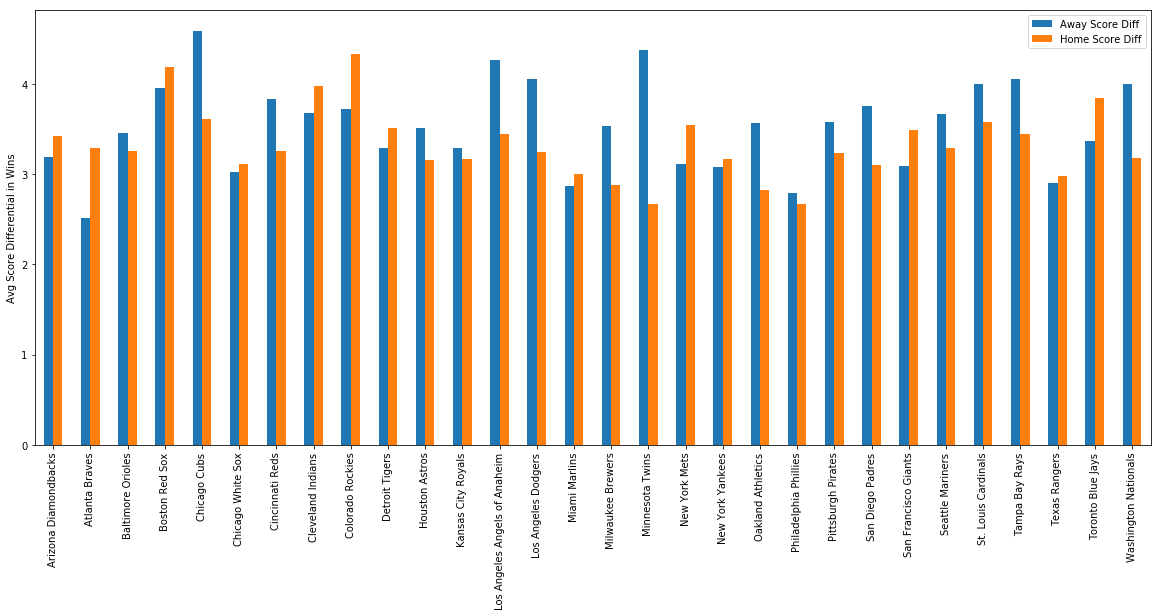

In [15]:
#Plot score differential data
score_diff = scoreDiff.plot.bar(figsize=(20,8))
score_diff.set_ylabel("Avg Score Differential in Wins")

In [16]:
print("Number of teams that have greater score diffferential in home wins then away: ", len(scoreDiff.loc[scoreDiff['Home Score Diff'] > scoreDiff['Away Score Diff']]))

Number of teams that have greater score diffferential in home wins then away:  13


In [17]:
homeGreater = scoreDiff.loc[scoreDiff['Home Score Diff'] > scoreDiff['Away Score Diff']]
averageDiff = homeGreater['Home Score Diff'].mean() - homeGreater['Away Score Diff'].mean()
print("Average Home Win Difference", averageDiff)

Average Home Win Difference 0.31011882708785476


In [18]:
stats.ttest_ind(scoreDiff['Home Score Diff'], scoreDiff['Away Score Diff'], equal_var = False)

Ttest_indResult(statistic=-1.7972045180290446, pvalue=0.07779432552110915)

When comparing the teams, 13 teams out of 30 teams have a greater score differential in home wins than away. The average difference in score for those 13 teams is .3101.


We ran a t-test using a confidence interval of .05. We obtained a p value of .07 so we fail to reject the null hypothes. Therefor we can say there is no significant difference between home and away score differentials. 

In [20]:
#Create Home errors dataframe
homeErrors = homeTeamSorted['home_team_errors']/81
homeErrors.head()

home_team
Arizona Diamondbacks    0.518519
Atlanta Braves          0.740741
Baltimore Orioles       0.481481
Boston Red Sox          0.493827
Chicago Cubs            0.580247
Name: home_team_errors, dtype: float64

In [22]:
#Create away errors dataframe
awayErrors = awayTeamSorted['away_team_errors']/81
awayErrors.head()

away_team
Arizona Diamondbacks    0.728395
Atlanta Braves          0.506173
Baltimore Orioles       0.506173
Boston Red Sox          0.432099
Chicago Cubs            0.666667
Name: away_team_errors, dtype: float64

In [24]:
#Concatenate Errors to make 1 dataframe
errors = pd.concat([awayErrors, homeErrors], sort=True, axis = 1)
errors.columns = ['Away Errors', 'Home Errors']
errors.head()

,Away Errors,Home Errors
Arizona Diamondbacks,0.728395,0.518519
Atlanta Braves,0.506173,0.740741
Baltimore Orioles,0.506173,0.481481
Boston Red Sox,0.432099,0.493827
Chicago Cubs,0.666667,0.580247


Text(0, 0.5, 'Avg Errors')

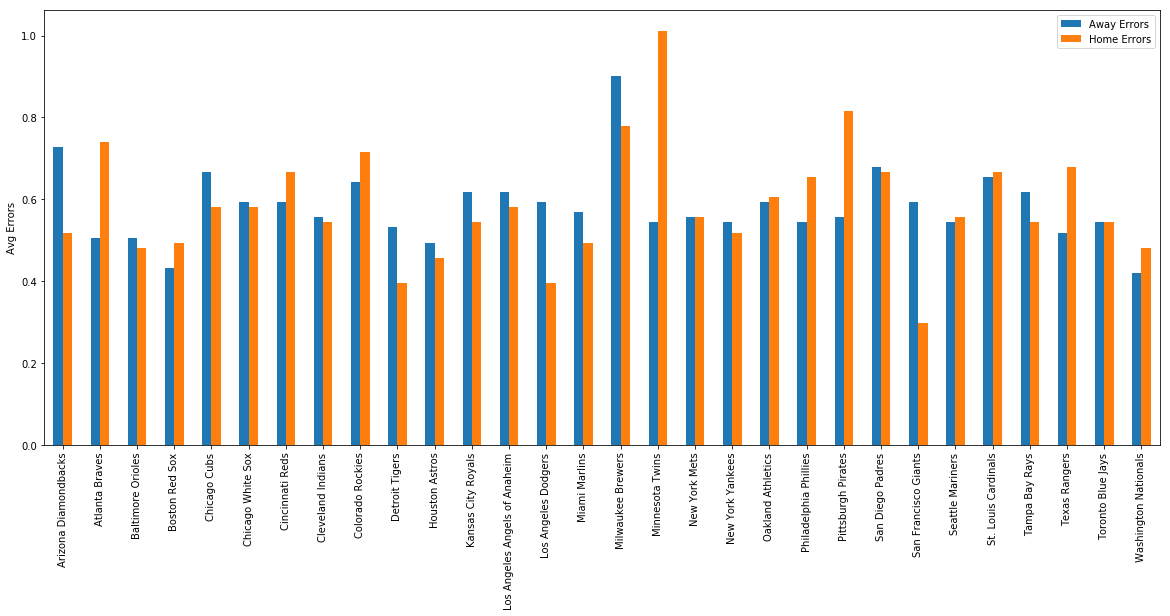

In [25]:
# Plot data
errorPlot = errors.plot.bar(figsize=(20,8))
errorPlot.set_ylabel("Avg Errors")

In [26]:
print("Number of teams that have more errors when away then at home: ", len(errors.loc[errors['Home Errors'] < errors['Away Errors']]))

Number of teams that have more errors when away then at home:  16


In [27]:
awayGreater = errors.loc[errors['Home Errors'] < errors['Away Errors']]
averageDiff = awayGreater['Away Errors'].mean() - awayGreater['Home Errors'].mean()
print("Average Away Error Diff", averageDiff)

Average Away Error Diff 0.08950617283950613


In [30]:
stats.ttest_ind(awayGreater['Away Errors'], awayGreater['Home Errors'], equal_var = False)

Ttest_indResult(statistic=2.3948683487448643, pvalue=0.02317239116160141)

When comparing the teams, 16 teams out of 30 teams have a greater Errors in away games then home. The average difference in score for those 16 teams is .089.


We ran a t-test using a confidence interval of .05. We obtained a p value of .02 so we reject the null hypothes. Therefor we can say there is a significant difference between number of errors that occur when away or home for teams that have more errors away than home.  